# 5a: Transient Absorption and Photochromism
## Objectives
In this experiment, you will be studying photochemical conformation changes.  The specific molecule studied here is similar to those found in photochromic eye-glasses (i.e. Transition Lens) and result in dramatic color change that is rapidly reversible. How fast the reverse reaction occurs will depend upon the dielectric constant and viscosity of the solvent. This experiment is aimed at studying the rapid photochromic change of 1,3-dihydro-1,3,3-trimethylspiro[2H-indole-2,3’-[3H]naphth[2,1-b][1,4]oxazine] (Photorome I) using laser-induced transient absorption spectroscopy.  

## Introduction
Each month more than 100 incidents of laser flashes being observed by aircraft pilots while in flight are reported to the NTSB. Photochromic systems are being made into rapid response optical filters to protect against such inadvertent laser blinding. To be a good optical filter, not only does the response of the filter to be have to be rapid, but it must also return to a clear state rapidly once the detected treat is no longer present.  This experiment seeks to study the photochromic response of Photorome I, shown below.

![Photorome I structure](photorome_I.png "Photorome I structure")

## Data Analysis: Model Fitting Example

Below is an example of using python to create a model fit of a transient absorption graph. The voltage is changed into $\Delta$OD through the equation $A$ = log($I_{0}$/$I$). $I$ is intensity, and it is represented by the voltage on the y-axis when you take the transient absorption.

In [7]:
#import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

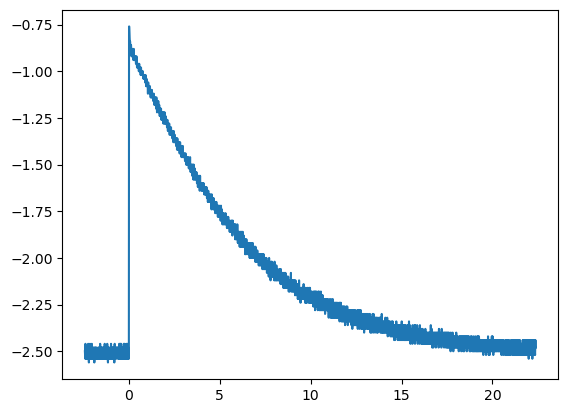

In [8]:
#import the file and plot it to make sure that you have the right data
raw_time, raw_voltage = np.loadtxt("K5_Hexane_550nm.CSV", delimiter=',', unpack = True, skiprows=17, usecols=(3,4))
plt.plot(raw_time, raw_voltage)

-2.5065843621399173


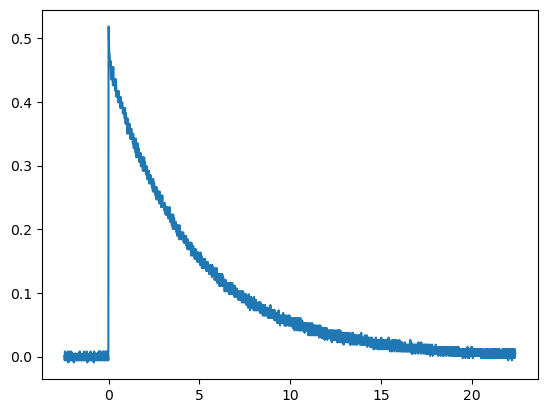

In [9]:
#calculate the average of the baseline to use as Io, then use the voltage as I and convert to delta OD. You should see a change in the y-axis values
initialIndex = 243
initialAverage = np.average(raw_voltage[:initialIndex])
print(initialAverage)
raw_deltaOD = np.log10(initialAverage/raw_voltage)
plt.plot(raw_time,raw_deltaOD)

Length of time array: (2483,)


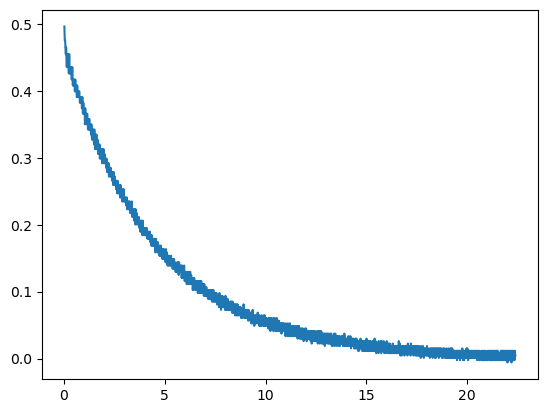

In [10]:
#cut the trace so that only the decay portion shows

print("Length of time array:", np.shape(raw_time)) #tells me how many x value points I have
index = 245
plt.plot(raw_time[index:], raw_deltaOD[index:]) #cuts off beginning of the plot to just show the decay, as shown by the : being put after the variable
time = raw_time[index:] #time of only the decay portion
deltaOD = raw_deltaOD[index:] 

In [11]:
#this uses the first order equation to make a model fit. you will need k, your rate constant, to compare to the other rate constants in your analysis

def exponential(x, a, k, b):
    return a*np.exp(k*x) + b

optData_first, covData_first = curve_fit(exponential, time, deltaOD, p0=(1400,-.1,0)) 
print(f"a = {optData_first[0]}, k = {optData_first[1]}, b = {optData_first[2]}")

a = 0.46060350540413586, k = -0.2208949637025744, b = 0.0016631075890340173


This is Hexane at 550nm


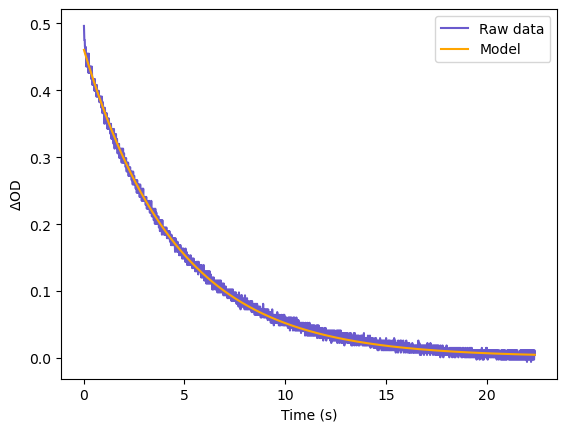

In [12]:
#plots the raw data and the model fit on top of each other

plt.plot(time, deltaOD, color='slateblue') #plot of raw data
plt.plot(time, exponential(time, optData_first[0],optData_first[1], optData_first[2]), color='orange') #plot of line of best fit
plt.legend(("Raw data", "Model"))
plt.ylabel("$\Delta$OD")
plt.xlabel("Time (s)")
plt.subplots_adjust(hspace=0)
print("This is Hexane at 550nm")